In [48]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data_files = ['bsp', 'ssp,s=3', 'ssp,s=4', 'ssp,s=5', 'ssp,s=6', 'ssp,s=7', 'asp']

In [49]:
data = {}

for file in data_files:
    acc, time, duration = [], [], 0
    with open(f'{file}.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if row[0] != '99':
                acc.append(float(row[2]))
                time.append(float(row[3]))
            else:
                duration = sum([int(i) for i in row][1:])
    data[file] = np.array(acc), np.array(time), duration

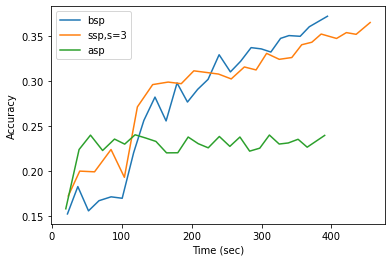

In [50]:
for series in data:
    if series in ['bsp', 'asp', 'ssp,s=3']:
        acc, time, _ = data[series]
        plt.plot(time, acc, label=series)

plt.xlabel("Time (sec)")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('abs.png', dpi=300)
plt.show()

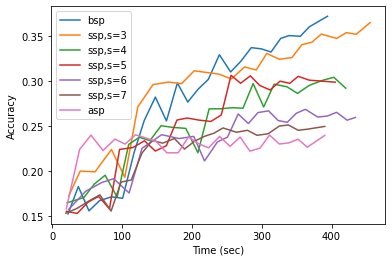

In [51]:
for series in data:
    acc, time, _ = data[series]
    plt.plot(time, acc, label=series)

plt.xlabel('Time (sec)')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('all.png', dpi=300)
plt.show()

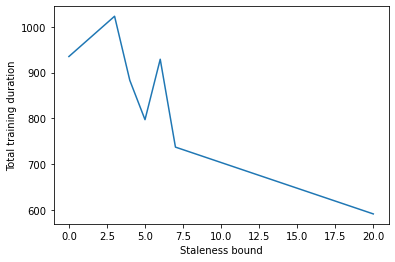

In [52]:
def name_to_s(name):
    if name == 'asp':
        return 20
    elif name == 'bsp':
        return 0
    else:
        return int(name.split('ssp,s=')[1])

durations = []
s_list = []

for series in data:
    _, _, duration = data[series]
    durations.append(duration)
    s_list.append(name_to_s(series))

plt.plot(s_list, durations)
plt.xlabel('Staleness bound')
plt.ylabel('Total training duration (sec)')
plt.savefig('duration.png', dpi=300)
plt.show()